In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


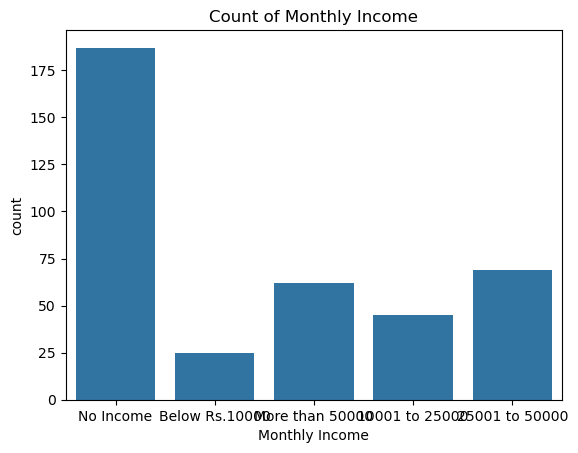

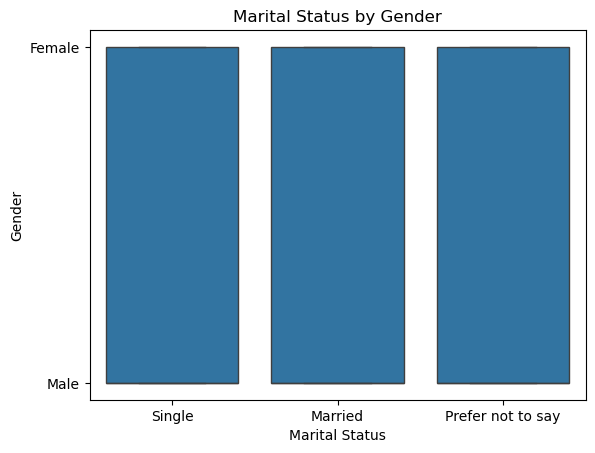

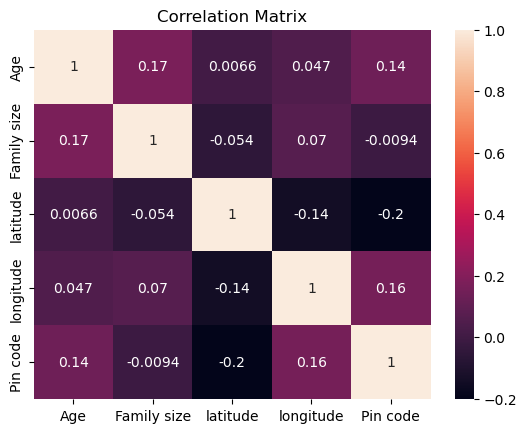

In [20]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('onlinefoods.csv')

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize some key features
sns.countplot(x='Monthly Income', data=df)
plt.title('Count of Monthly Income')
plt.show()

sns.boxplot(x='Marital Status', y='Gender', data=df)
plt.title('Marital Status by Gender')
plt.show()

# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_columns].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Handling missing values
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# Encoding categorical variables
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Splitting the dataset into training and testing sets
X = df.drop('Output', axis=1)
y = df['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [11]:
# KNN
pip install scikit-learn

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.88
              precision    recall  f1-score   support

          No       0.59      0.83      0.69        12
         Yes       0.97      0.89      0.93        66

    accuracy                           0.88        78
   macro avg       0.78      0.86      0.81        78
weighted avg       0.91      0.88      0.89        78

Random Forest Accuracy: 0.90
              precision    recall  f1-score   support

          No       0.70      0.58      0.64        12
         Yes       0.93      0.95      0.94        66

    accuracy                           0.90        78
   macro avg       0.81      0.77      0.79        78
weighted avg       0.89      0.90      0.89        78

KNN Accuracy: 0.87
              precision    recall  f1-score   support

          No       0.62      0.42      0.50        12
         Yes       0.90      0.95      0.93        66

    accuracy                           0.87        78
   macro avg       0.76      0.69      0.71        

In [26]:
# Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
best_rf_model = grid_search.best_estimator_

# Re-evaluate the tuned model
y_pred_tuned = best_rf_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Random Forest Accuracy: {accuracy_tuned:.2f}')
print(classification_report(y_test, y_pred_tuned))


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.88
              precision    recall  f1-score   support

          No       0.64      0.58      0.61        12
         Yes       0.93      0.94      0.93        66

    accuracy                           0.88        78
   macro avg       0.78      0.76      0.77        78
weighted avg       0.88      0.88      0.88        78

